In [168]:
# ***** ATTENTION! *****
# If you want that the "%matplotlib widget" works, you need the package ipympl (pip install ipympl)
#
#
# MATPLOTLIB INTERACTIVE VISUALIZATION. REMOVE (OR COMMENT) IF YOU NEED TO PRINT THE NOTEBOOK AS A PDF, SOMETIMES IT DOES NOT WORK WELL...
%matplotlib widget


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import yaml #loading dictionary
from IPython.display import display  # to display variables in a "nice" way

try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

# pd.options.display.max_rows = 9999
pd.options.display.max_columns = 20

In [169]:
response_df= pd.read_csv("datasets/responses_hw.csv", na_values=["", " "])
columns_df = pd.read_csv("datasets/columns_hw.csv")

response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to Home Type
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [170]:
# response_df.dropna(inplace=True,axis=0)
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to Home Type
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


Let's check if we can delete all the rows with a NaN value.

array(['drink a lot', 'social drinker', 'never', nan], dtype=object)
array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
       nan], dtype=object)

In [171]:
# response_df_firsts = response_df.iloc[:, :-10]

# Smoking= {"never smoked":1, "tried smoking":2, "former smoker":3, "current smoker":5, np.nan: 0}
# Alcohol= {"never":1, "social drinker":3, "drink a lot":5, np.nan:0}
# Punctuality= {"late":1, "on time":3, "early":5, np.nan: 0}
# Lying= {"never":1,"only to avoid hurting someone":2, "sometimes":3, "everytime it suits me":5, np.nan: 0}
# Internet_Usage= {"no time at all":1,"less than an hour a day":2, "few hours a day":3, "most of the day":5, np.nan:0}

# response_df_firsts["Smoking"] = np.array([Smoking[val] for val in response_df_firsts["Smoking"].values])
# response_df_firsts["Alcohol"] = np.array([Alcohol[val] for val in response_df_firsts["Alcohol"].values])
# response_df_firsts["Punctuality"] = np.array([Punctuality[val] for val in response_df_firsts["Punctuality"].values])
# response_df_firsts["Lying"] = np.array([Lying[val] for val in response_df_firsts["Lying"].values])
# response_df_firsts["Internet usage"] = np.array([Internet_Usage[val] for val in response_df_firsts["Internet usage"].values])
        

In [172]:
min=MinMaxScaler(feature_range=(1,5))
response_df_firsts=response_df.iloc[:,:-10]
print(np.shape(response_df_firsts))
for i in response_df_firsts.columns.to_list():
    if not isinstance(response_df_firsts[i].values[0], np.number):
        valori = response_df_firsts[i].unique()
        trans=np.round(min.fit_transform(np.array(range(len(response_df_firsts[i].dropna().unique()))).reshape(-1,1))).flatten().tolist()
        
        # if we don't use .dropna
        if any(pd.isna(val) for val in valori):
            trans.append(0)
        print(valori, trans)
        serie = {k:v for k, v in zip(valori, trans)}
        response_df_firsts[i] = pd.Series([serie[el] for el in response_df_firsts[i].values])
response_df_firsts.fillna(-1, inplace=True)

(1010, 140)
['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan] [1.0, 2.0, 4.0, 5.0, 0]
['drink a lot' 'social drinker' 'never' nan] [1.0, 3.0, 5.0, 0]
['on time' 'early' 'late' nan] [1.0, 3.0, 5.0, 0]
['never' 'sometimes' 'only to avoid hurting someone'
 'everytime it suits me' nan] [1.0, 2.0, 4.0, 5.0, 0]
['few hours a day' 'most of the day' 'less than an hour a day'
 'no time at all'] [1.0, 2.0, 4.0, 5.0]


In [173]:
response_df.to_csv("datasets/output.csv")

In [174]:
type(response_df["Smoking"])

pandas.core.series.Series

In [175]:
response_df.isna().sum(axis=0)

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Hand                        3
Education                   1
Only child                  2
Home Town Type              4
Home Type                   4
Length: 150, dtype: int64

In [176]:
response_df.info(), columns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to Home Type
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   original  150 non-null    object
 1   short     150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


(None, None)

In [177]:
# split the main dataset


col =response_df.columns.to_list()
entertainment= col[0:63]
personality= col[63:63+77]
demographics = col[63+77: 63+77+10]

entertainment_df=response_df[entertainment]
personality_df=response_df[personality]
demographics_df=response_df[demographics]


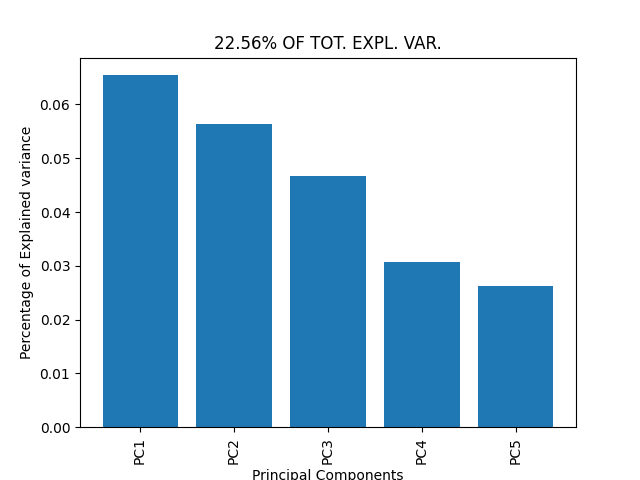

In [178]:
m=5
pca= PCA(n_components=m)
pca.fit(response_df_firsts.values)

round_expl_var_ratio = np.round(pca.explained_variance_ratio_.sum()*100,decimals=2)  # <-- TODO!!

plt.figure()
plt.bar(range(1,m+1), pca.explained_variance_ratio_)
plt.title(f"{round_expl_var_ratio}% OF TOT. EXPL. VAR.")
plt.xticks(ticks=np.arange(1,m+1), 
           labels=[f"PC{i}" for i in range(1,m+1)],
           rotation=90)
plt.xlabel("Principal Components")
plt.ylabel("Percentage of Explained variance")
plt.show()


In [179]:
pca.explained_variance_ratio_

array([0.06544122, 0.05640153, 0.04671946, 0.03075526, 0.02623768])

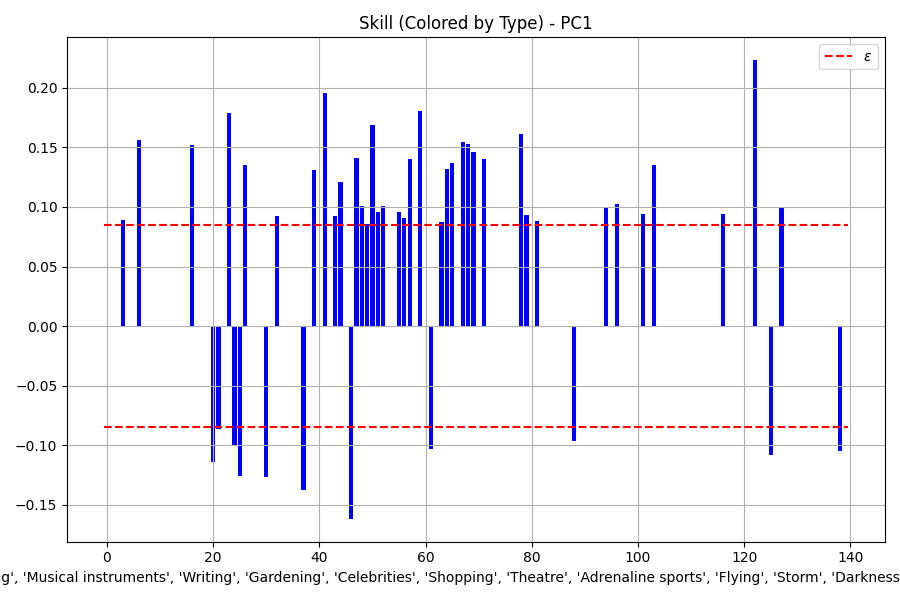

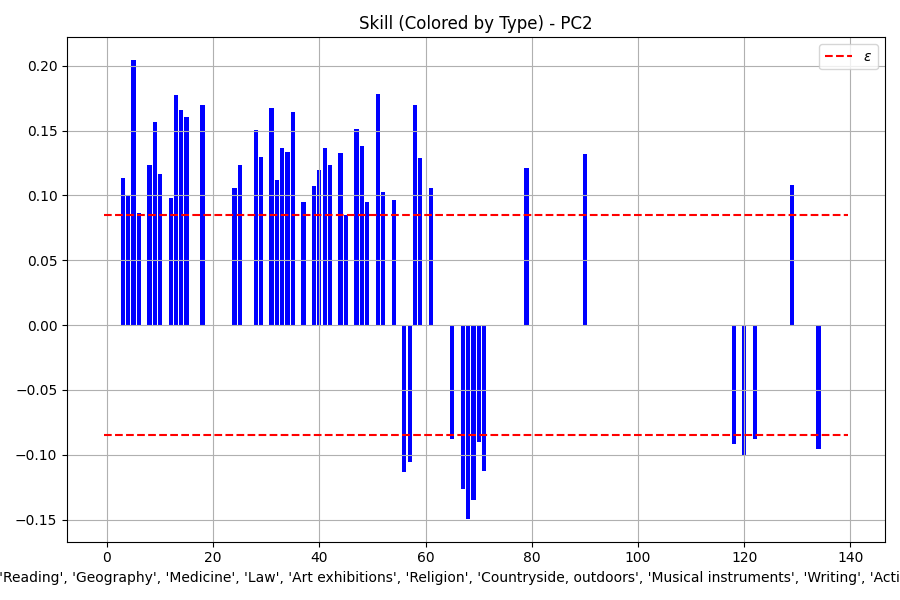

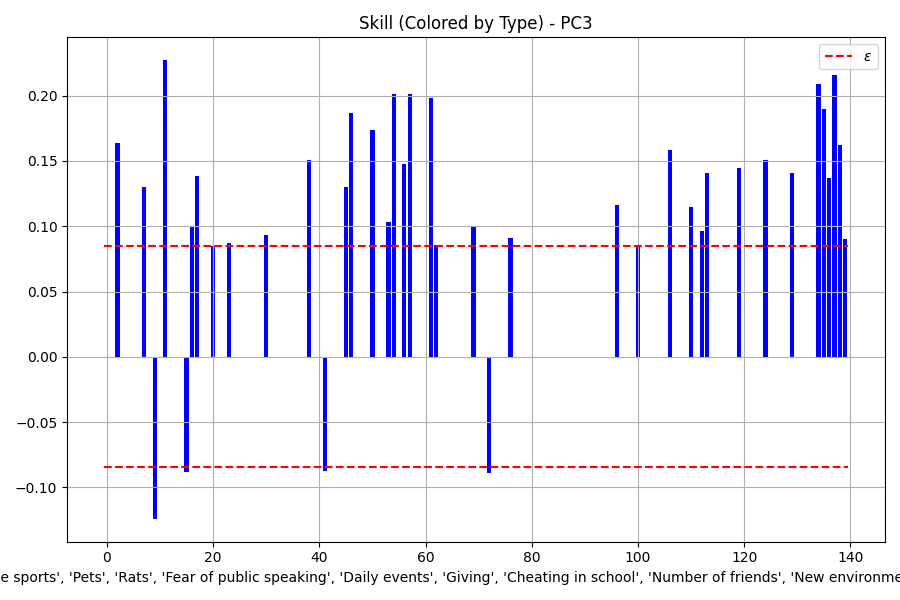

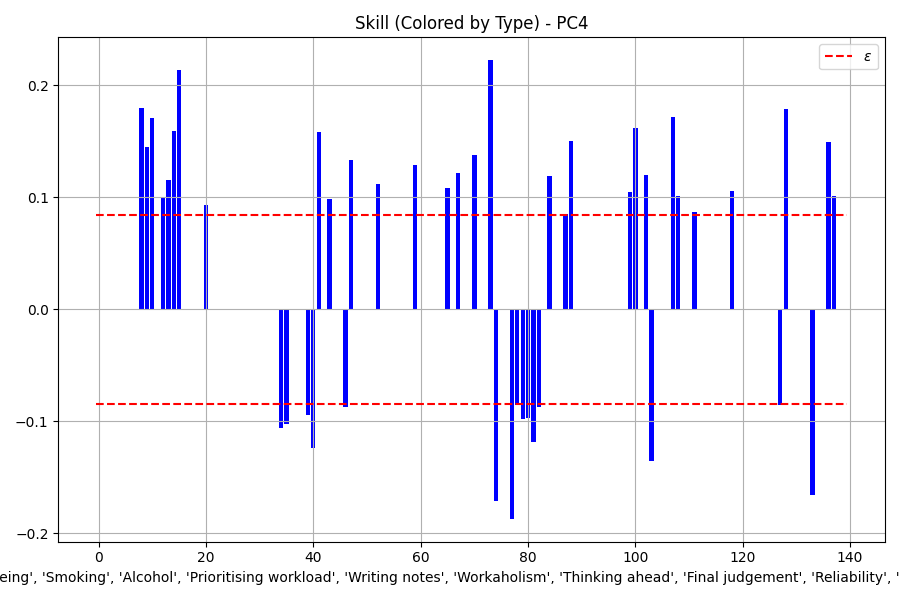

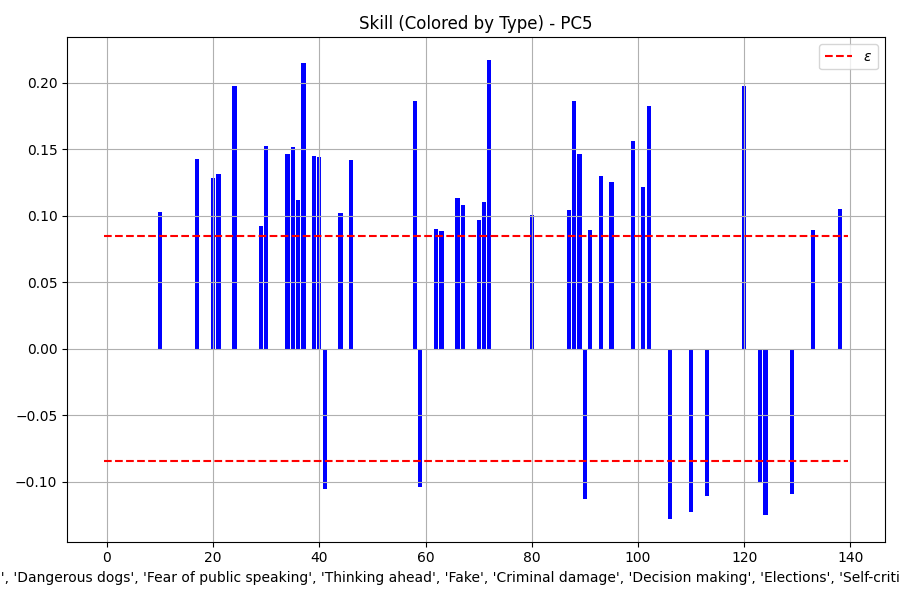

In [180]:
import numpy as np
import matplotlib.pyplot as plt

# Calcolo di epsilon
eps = np.sqrt(1 / pca.n_features_in_)

# Lista delle colonne
cols = response_df_firsts.columns.to_list()

# Ciclo per ogni componente principale
for ii in range(m):
    # Indici di componenti maggiori o uguali a epsilon (positivo e negativo)
    ind_great_pos_PCii = np.where(pca.components_[ii, :] >= eps)[0]
    ind_great_neg_PCii = np.where(pca.components_[ii, :] <= -eps)[0]
    ind_significant = np.union1d(ind_great_pos_PCii, ind_great_neg_PCii)  # Unione degli indici

    # Estrarre i label significativi
    significant_labels = [cols[idx] for idx in ind_significant]
    significant_values = pca.components_[ii, ind_significant]

    # Creazione del barplot
    plt.figure(figsize=(9, 6))
    #tupl= sorted(zip(ind_significant, significant_values), reverse=True, key=lambda x: x[1]) 
    plt.bar(ind_significant, significant_values, color='blue')
    plt.plot([-0.5, len(cols) - 0.5], [eps, eps], "red", linestyle="--", label=r"$\epsilon$")
    plt.plot([-0.5, len(cols) - 0.5], [-eps, -eps], "red", linestyle="--")
    plt.xlabel(significant_labels)
    plt.title(f"Skill (Colored by Type) - PC{ii + 1}")
    plt.grid()
    plt.tight_layout()
    plt.legend()
    plt.show()


In [181]:
pc_names=["pc1",
          "pc2",
          "pc3"]

c:\Users\Claudio\Desktop\Projects\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


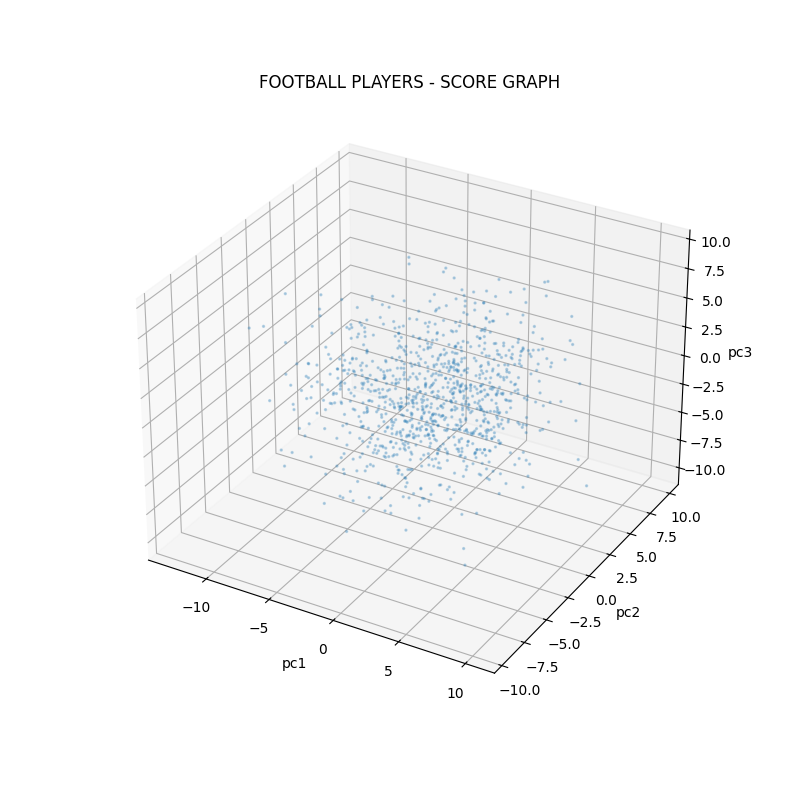

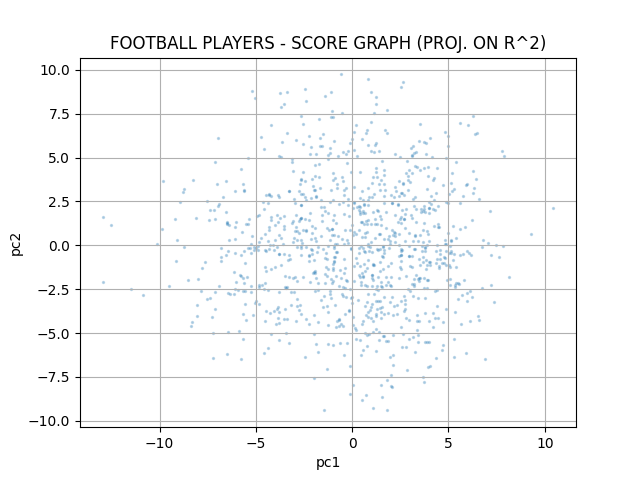

In [182]:
# COMPUTE THE DATA TRANSFORMATION INTO THE PC-SPACE
response_df_firsts_pca = pca.transform(response_df_firsts)  # <-- TODO!!

# MAKE THE 3D SCORE GRAPH
sg_3d = plt.figure(figsize=(8, 8))
ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(response_df_firsts_pca[:,0], response_df_firsts_pca[:,1], response_df_firsts_pca[:,2], s=2, alpha=0.25)  # <-- TODO!!
plt.title('FOOTBALL PLAYERS - SCORE GRAPH')
ax_sg_3d.set_xlabel(pc_names[0])
ax_sg_3d.set_ylabel(pc_names[1])
ax_sg_3d.set_zlabel(pc_names[2])
plt.grid()
plt.show()

# MAKE THE 2D SCORE GRAPH
plt.figure() # <-- TODO!!
plt.scatter(response_df_firsts_pca[:,0], response_df_firsts_pca[:,1], s=2, alpha=0.25)
plt.title("FOOTBALL PLAYERS - SCORE GRAPH (PROJ. ON R^2)")
plt.xlabel(pc_names[0])
plt.ylabel(pc_names[1])
plt.grid()
plt.show()

In [183]:
# SET THE RANDOM STATE (THE LABORATORY DAY)
random_state = 343572

# INITIALIZE SOME LISTS TO STORE THE TEMPORARY RESULTS AND, THEN, MAKE COMPARISONS
km_list = []
silcoeff_list = []
k_list = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE k-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_list)):
    print(f'****************** START k-MEANS WITH k={k_list[i]} ******************')
    print('Computing...')
    km_list.append(KMeans(n_clusters=k_list[i], n_init=3, random_state=random_state))  # <-- TODO!!
    km = km_list[i]
    km.fit(response_df_firsts_pca) # <-- TODO!!
    silcoeff_list.append(silhouette_score(response_df_firsts_pca, km.labels_))  # <-- TODO!!
    print(f'****************** END k-MEANS WITH k={k_list[i]} ******************')
    print('')

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best = np.argmax(silcoeff_list)  # <-- TODO!!
k = k_list[i_best]
km = km_list[i_best]

# VISUALIZE THE RESULT
print('')
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list)} --> k = {k}')  # <-- TODO!!
print('**************************************************************')

****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************

****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************

****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************

****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************

****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************

****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************

****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************

****************** START k-MEANS WITH k=10 ******************


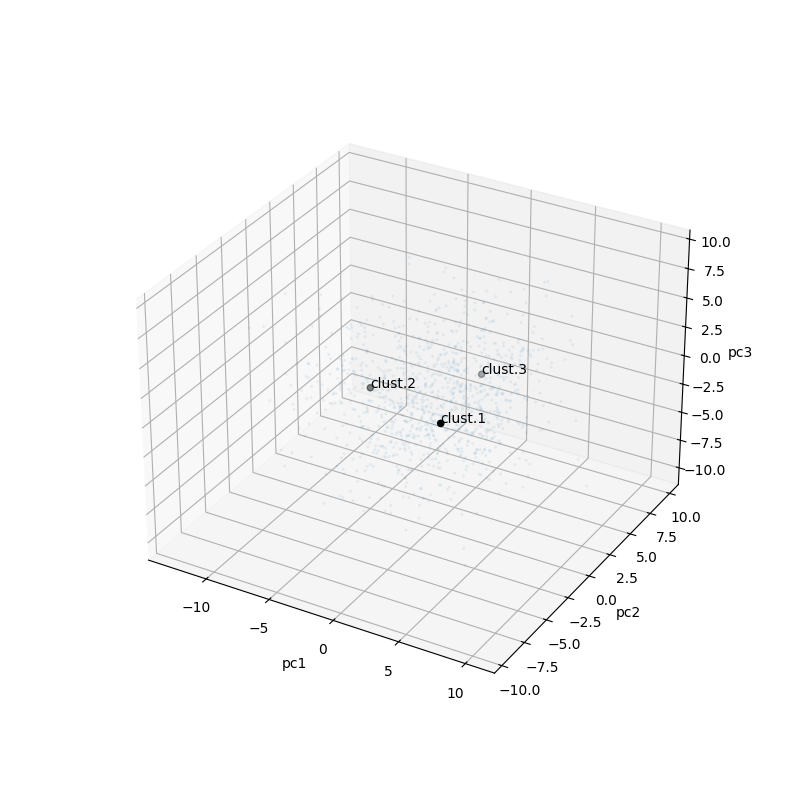

In [184]:
# MAKE THE 3D SCORE GRAPH WITH THE CENTROIDS
sg_3d_km= plt.figure(figsize=(8,8)) #<-- TODO!!
ax_sg_3d_km = sg_3d_km.add_subplot(111, projection="3d")
ax_sg_3d_km.scatter(response_df_firsts_pca[:,0],response_df_firsts_pca[:,1],response_df_firsts_pca[:,2], s=2, alpha=0.05)
ax_sg_3d_km.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],c="black")

# CODE FOR WRITING CLUSTERS' INDICES IN THE PLOT
for kk in range(k):
    ax_sg_3d_km.text(km.cluster_centers_[kk, 0], km.cluster_centers_[kk, 1], km.cluster_centers_[kk, 2], f'clust.{kk + 1}')
ax_sg_3d_km.set_xlabel(pc_names[0])#<-- TODO!!
ax_sg_3d_km.set_ylabel(pc_names[1])
ax_sg_3d_km.set_zlabel(pc_names[2])
plt.grid()
plt.show()